# Plot results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

In [2]:
df_alg_1 = pd.read_csv("data/Algorithm1_2357/"+os.listdir("data/Algorithm1_2357")[0], index_col=0, header=1)
df_alg_1["iteration"] = 0
for i, d in enumerate(os.listdir("data/Algorithm1_2357")[1:]):
    app = pd.read_csv("data/Algorithm1_2357/"+d, index_col=0, header=1)
    app["iteration"] = i + 1
    df_alg_1 = pd.concat([df_alg_1, app], axis=0)

In [3]:
df_alg_2 = pd.read_csv("data/Algorithm2_2357/"+os.listdir("data/Algorithm2_2357")[0], index_col=0, header=1)
df_alg_2["iteration"] = 0
for i, d in enumerate(os.listdir("data/Algorithm2_2357")[1:]):
    app = pd.read_csv("data/Algorithm2_2357/"+d, index_col=0, header=1)
    app["iteration"] = i + 1
    df_alg_2 = pd.concat([df_alg_2, app], axis=0)

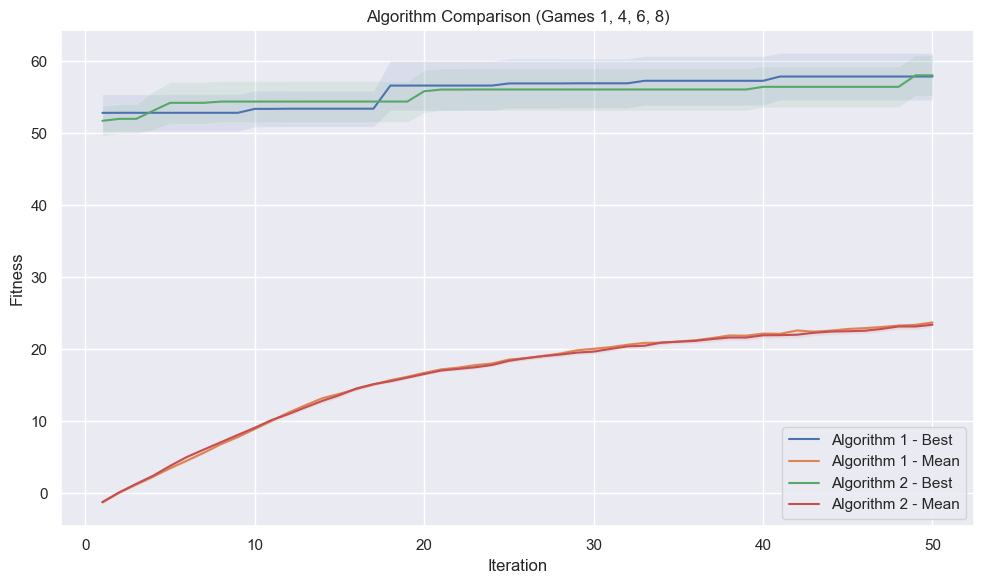

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() #optional: set seaborn theme
import numpy as np
import pandas as pd

def plot_algorithm(df, algorithm_name, linestyle):
    mean = df[["Best", "Mean"]].groupby([df.index]).mean()
    std_dev = df[["Best", "Mean"]].groupby([df.index]).std()

    plt.plot(mean["Best"], label=f"{algorithm_name} - Best", linestyle=linestyle)
    plt.plot(mean["Mean"], label=f"{algorithm_name} - Mean", linestyle=linestyle)
    plt.fill_between(mean.index, mean["Best"] - std_dev["Best"]/np.sqrt(10), mean["Best"] + std_dev["Best"]/np.sqrt(10), alpha=0.1)
    plt.fill_between(mean.index, mean["Mean"] - std_dev["Mean"]/np.sqrt(10), mean["Mean"] + std_dev["Mean"]/np.sqrt(10), alpha=0.1)


# Assuming df_alg_1 and df_alg_2 are your dataframes
plt.figure(figsize=(10, 6)) # Adjust figure size as needed

plot_algorithm(df_alg_1, "Algorithm 1", "-") #solid line
plot_algorithm(df_alg_2, "Algorithm 2", "-") #dashed line


plt.title("Algorithm Comparison (Games 1, 4, 6, 8)")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.legend()
plt.grid(True) # Add grid for better readability
plt.tight_layout()
plt.savefig("alg_comparison.png", bbox_inches="tight", dpi=200)
plt.show()